<a href="https://colab.research.google.com/github/HARSHIT097/Learnings/blob/main/Project9_predicting_mileage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description




## Project Description: 
The following project aims to predict mileage per gallon(mps) using various technical specifications (features) as input to the regression algorithms. 

## Database Description:

The data is technical spec of cars. This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Number of Instances: 398

Number of Attributes: 9 including the class attribute

## Attribute Information:

mpg: continuous cylinders: multi-valued discrete displacement: continuous horsepower: continuous weight: continuous acceleration: continuous model year: multi-valued discrete origin: multi-valued discrete car name: string (unique for each instance) Missing Attribute Values: horsepower has 6 missing values

## Libraries Involved:
1. pandas
2. Numpy
3. Seaborn
4. Matplotlib

## Steps Involved:
1. Importing the libraries
2. Loading the dataset
3. Data Preprocessing
4. Study Correlation
5. Univariate Analysis
6. Bivariate Analysis
7. train and test data split
8. Building the model

## Machine Learning Steps Involved
1. Linear Regression
2. Polynomial Regression



# Step-1 Importing the libraries

In [ ]:
import pandas as pd #data processing along with the I/o operations
import numpy as np
#linear algebra

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline #magic function

UsageError: unrecognized arguments: #magic function


#step-2 Preprocessing

In [ ]:
#loading the dataset

data=pd.read_csv('/content/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.drop(['car name'], axis = 1, inplace=True)
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
data = data[data.horsepower != '?']

In [ ]:
'?' in data

False

In [ ]:
data.shape

(392, 8)

#correlation matrix and heat map

In [ ]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

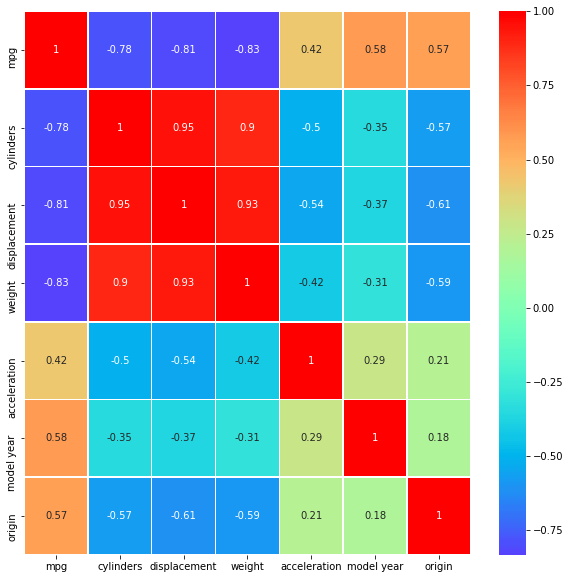

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), annot= True, linewidths=0.5, center=0, cmap='rainbow')
plt.show()

# Univariate and multi variate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


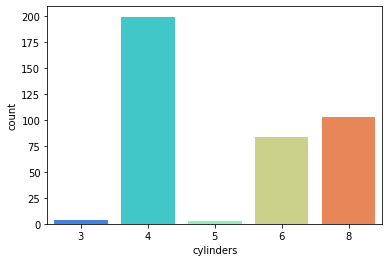

In [ ]:
sns.countplot(data.cylinders, data=data, palette='rainbow')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


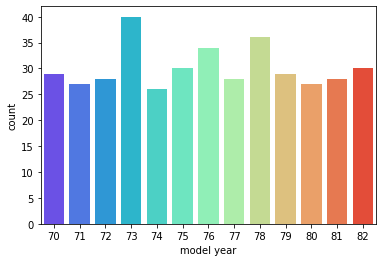

In [ ]:
sns.countplot(data['model year'], data=data, palette='rainbow')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


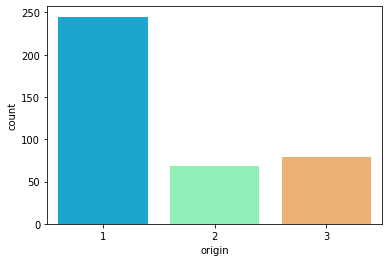

In [ ]:
sns.countplot(data.origin, data=data, palette='rainbow')
plt.show()

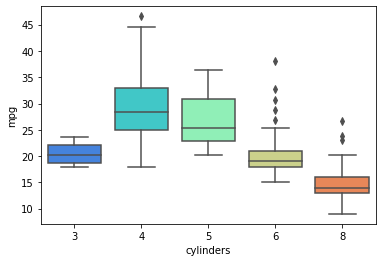

In [ ]:
##multivariate
sns.boxplot(y='mpg', x='cylinders', data=data, palette='rainbow')
plt.show()



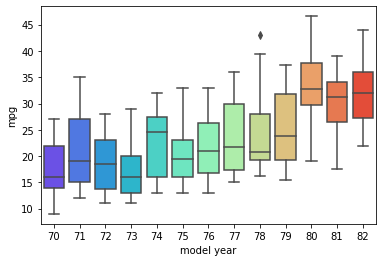

In [ ]:
sns.boxplot(y='mpg', x='model year', data=data, palette='rainbow')
plt.show()

# Data set modelling train test split

In [ ]:
X = data.iloc[:,1:].values
y= data.iloc[:, 0].values

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Model building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.8191428142279117


In [ ]:
### an advance type of regression technique 

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

print(model_2.score(X_test, y_test))

0.8342085922759281


#Conclusion

Find the difference between the two model just because of fitting of data gets better and there is increase in accuracy




..


...



...